**Goal**<br>
ResNet18 is a model designed to classify large images, like those found in the ImageNet dataset. The goal of this excercise is to modify the ResNet18 architecture so that it could be trained on the MNIST dataset, consisting of smaller images.

*Before you start, make sure to change the runtime type to include a GPU!*

<br>

**Task 1 (adding one line of code)**<br>
Modify the first convolutional layer by:
*   Changing the size of the filter (kernel) from 7 to 3
*   Changing the stride of the filter from 2 to 1
*   Changing the padding of the input from 3 to 1
*   Changing the number of input channels from 3 (RGB) to 1 (grayscale)

<br>

**Task 2 (adding one line of code)**<br>
Modify the first max-pooling layer by:
*   Changing the size of the pooling neighbourhood from 3 to 1 
*   Changing the stride of the pooling neighbourhood from 2 to 1
*   Changing the padding of the input from 1 to 0

<br>

**Task 3 (adding one line of code)**<br>
A single line of code, cirtical to the training of the network, has been purposefully deleted by a malicious individual. Insert the missing line of code and verify the network reaches (around) 99% accuracy on the test dataset after the correction.

<br>

**Submission**<br>
*   Download your code by clicking File -> Download .ipynb
*   Submit your downloaded code on Quercus

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import matplotlib.pyplot as plt

from torchvision import datasets, transforms

In [2]:
# hyperparameters
device        = "cuda"
lr            = 0.1
epochs        = 3
batch_size    = 128
momentum      = 0.9
weight_decay  = 5e-4

In [3]:
# deep network
model = models.resnet18(pretrained=False, num_classes=10)

# ADD CODE HERE
model.conv1 = nn.Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
model.maxpool = nn.MaxPool2d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)

model = model.to(device)

# dataset loaders
transform = transforms.Compose([transforms.Pad(2),
                                transforms.ToTensor(),
                                transforms.Normalize(0.1307,0.3081)])

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', download=True, train=True, transform=transform), 
    batch_size=batch_size, shuffle=True, drop_last=True)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', download=True, train=False, transform=transform),
    batch_size=batch_size, shuffle=False, drop_last=False)

# loss function
loss_function = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(),
                      lr=lr,
                      momentum=momentum,
                      weight_decay=weight_decay)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



Train		Epoch: 1 	Batch 1/468 (0%) 	Batch Loss: 2.311699 	Batch Accuracy: 16.406250
Train		Epoch: 1 	Batch 2/468 (0%) 	Batch Loss: 2.439679 	Batch Accuracy: 15.234375
Train		Epoch: 1 	Batch 3/468 (1%) 	Batch Loss: 2.522228 	Batch Accuracy: 18.489583
Train		Epoch: 1 	Batch 4/468 (1%) 	Batch Loss: 2.942416 	Batch Accuracy: 17.187500
Train		Epoch: 1 	Batch 5/468 (1%) 	Batch Loss: 2.101776 	Batch Accuracy: 22.656250
Train		Epoch: 1 	Batch 6/468 (1%) 	Batch Loss: 3.881001 	Batch Accuracy: 23.697917
Train		Epoch: 1 	Batch 7/468 (1%) 	Batch Loss: 3.944075 	Batch Accuracy: 25.558036
Train		Epoch: 1 	Batch 8/468 (2%) 	Batch Loss: 4.080237 	Batch Accuracy: 26.171875
Train		Epoch: 1 	Batch 9/468 (2%) 	Batch Loss: 5.339277 	Batch Accuracy: 25.086806
Train		Epoch: 1 	Batch 10/468 (2%) 	Batch Loss: 5.387559 	Batch Accuracy: 26.328125
Train		Epoch: 1 	Batch 11/468 (2%) 	Batch Loss: 5.341885 	Batch Accuracy: 28.977273
Train		Epoch: 1 	Batch 12/468 (3%) 	Batch Loss: 6.902044 	Batch Accuracy: 29.492188
T

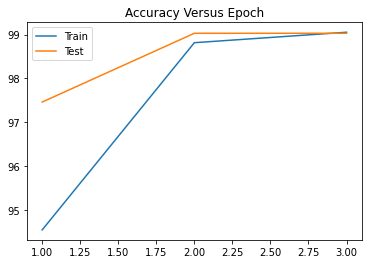

In [4]:
train_accuracy = []
test_accuracy = []

# iterate over epochs
for epoch in range(1, epochs+1):
    # train phase
    model.train()
    accuracy = 0
    N = 0

    # iterate over train data
    for batch_idx, (images, labels) in enumerate(train_loader, start=1):
        images, labels = images.to(device), labels.to(device)
        
        # forward pass
        logits = model(images)
        loss = loss_function(logits, labels)

        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # check if predicted labels are equal to true labels
        predicted_labels = torch.argmax(logits,dim=1)
        accuracy += torch.sum((predicted_labels==labels).float()).item()
        N += images.shape[0]

        print('Train\t\tEpoch: {} \t'
              'Batch {}/{} ({:.0f}%) \t'
              'Batch Loss: {:.6f} \t'
              'Batch Accuracy: {:.6f}'.format(
                  epoch,
                  batch_idx,
                  len(train_loader),
                  100. * batch_idx / len(train_loader),
                  loss.item(),
                  100. * accuracy/N))
    train_accuracy.append(100. * accuracy/N)



    # test phase
    model.eval()
    accuracy = 0
    N = 0

    # iterate over test data
    for batch_idx, (images, labels) in enumerate(test_loader, start=1):
        images, labels = images.to(device), labels.to(device)

        # forward pass
        logits = model(images)
        
        # check if predicted labels are equal to true labels
        predicted_labels = torch.argmax(logits,dim=1)
        accuracy += torch.sum((predicted_labels==labels).float()).item()
        N += images.shape[0]
    test_accuracy.append(100. * accuracy/N)
    print(test_accuracy[-1])



# plot results
plt.title('Accuracy Versus Epoch')
plt.plot(range(1, epochs+1), train_accuracy, label='Train')
plt.plot(range(1, epochs+1), test_accuracy, label='Test')
plt.legend()

plt.savefig('plot.png')